In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter # To build the category
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet 
import matplotlib.pyplot as plt 
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
ps = PorterStemmer() # To perform stemming
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Libraries for handling/eliminating stopworads.
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from posixpath import join
import math
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Importing train_data.csv
# Reference: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
from google.colab import files
product_review_dataset = files.upload()

Saving Flipkart_Reviews_Electronics.csv to Flipkart_Reviews_Electronics.csv


In [3]:
# Here we are reading the CSV file we just imported.
# Reference: https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
import pandas as pd
import io
review_df = pd.read_csv(io.BytesIO(product_review_dataset['Flipkart_Reviews_Electronics.csv']))
print(review_df)

            product_id                                      product_title  \
0     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
1     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
2     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
3     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
4     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
...                ...                                                ...   
9369  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9370  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9371  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9372  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9373  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   

      rating               summary  \
0          5     Terrific purchase   

In [4]:
review_df.head(5)

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114


In [5]:
review_df.isna().sum()

product_id          0
product_title       0
rating              0
summary             0
review              0
location         1293
date                0
upvotes             0
downvotes           0
dtype: int64

In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     9374 non-null   object
 1   product_title  9374 non-null   object
 2   rating         9374 non-null   int64 
 3   summary        9374 non-null   object
 4   review         9374 non-null   object
 5   location       8081 non-null   object
 6   date           9374 non-null   object
 7   upvotes        9374 non-null   int64 
 8   downvotes      9374 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 659.2+ KB


In [7]:
len(review_df)

9374

In [9]:
concanitated_df = pd.DataFrame()
concanitated_df['my_data'] = review_df['product_id'] + ' ' + review_df['product_title'] + ' ' + str(review_df['rating']) + ' ' + review_df['summary'] + ' ' + review_df['review'] + ' ' + review_df['location'] + ' ' + str(review_df['date']) + ' ' + str(review_df['upvotes']) + ' ' + str(review_df['downvotes'])
concanitated_df['summary'] = review_df['summary']

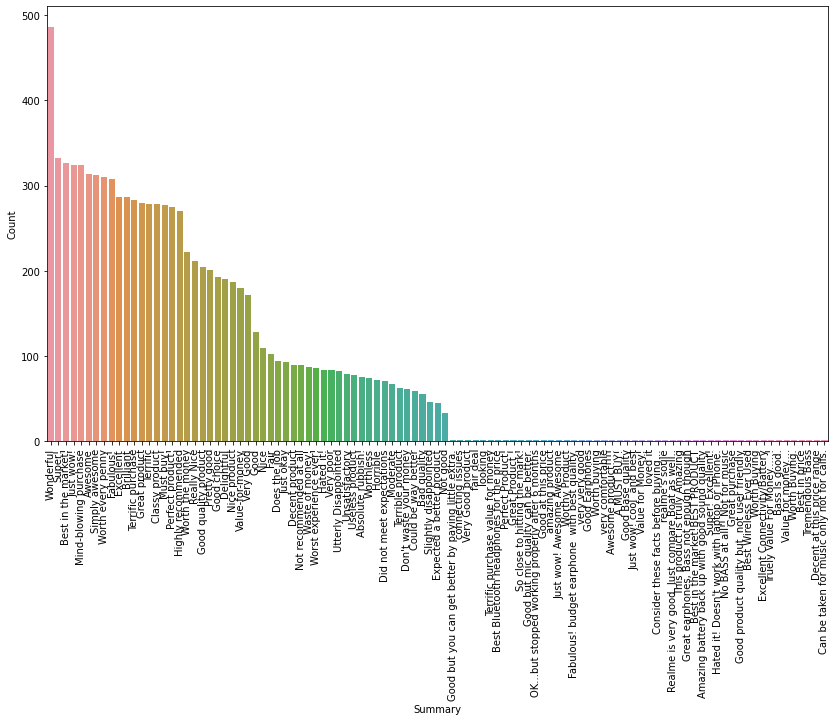

In [8]:
plt.figure(figsize=(14,8))
freq = review_df.summary.value_counts()
sns.barplot(x=freq.index, y=freq)
plt.xlabel('Summary')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [10]:
concanitated_df

,my_data,summary
0,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase
1,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase
2,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Super!
3,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Super!
4,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase
...,...,...
9369,ACCEVQZABYWJHRHF BoAt BassHeads 100 Wired Head...,Good quality product
9370,ACCEVQZABYWJHRHF BoAt BassHeads 100 Wired Head...,Awesome
9371,ACCEVQZABYWJHRHF BoAt BassHeads 100 Wired Head...,Really Nice
9372,ACCEVQZABYWJHRHF BoAt BassHeads 100 Wired Head...,Super!


In [11]:
concanitated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   my_data  8081 non-null   object
 1   summary  9374 non-null   object
dtypes: object(2)
memory usage: 146.6+ KB


In [12]:
concanitated_df.fillna(" ",inplace = True)
concanitated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   my_data  9374 non-null   object
 1   summary  9374 non-null   object
dtypes: object(2)
memory usage: 146.6+ KB


In [13]:
# Removing stopwords
import re
# Reference: https://www.kaggle.com/code/devashishpandit/naive-bayes-on-news-category-dataset
print(", ".join(stopwords.words('english')))
same = set(stopwords.words('english'))

def preprocessing(p_reviews):
    p_reviews = " ".join([word for word in str(p_reviews).split() 
    if word not in same])
    p_reviews = re.sub(r'[^A-Za-z0-9 ]+', 
                       '',
                       p_reviews)
    return p_reviews

# I am basically creating a new coloumn of concatinated data on which we will follow our analysis.
concanitated_df['no_stop_words_data'] = concanitated_df['my_data'].apply(preprocessing)

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [14]:
# As you can see we a seperate colomn were no stop words are involved.
concanitated_df.head(15)
# Consider row #1 my_data colomn here you can see that we have stop words like "with'.
# Now compair this colomn with no_stop_words_data colomn, here can see that we don't have those kind of words.

,my_data,summary,no_stop_words_data
0,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
1,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
2,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Super!,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
3,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Super!,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
4,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
5,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Wonderful,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
6,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Pretty good,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
7,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Terrific purchase,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
8,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Delightful,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...
9,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 with ASAP ...,Worthless,ACCFZGAQJGYCYDCM BoAt Rockerz 235v2 ASAP charg...


In [15]:
# Here we divide/split dataset into train, validate and test. The division is as follows - 60% is Training data, 20% Validation and 20% for Testing.
def data_spliter():
  train, validate, test = \
              np.split(concanitated_df.sample(frac=1, random_state=42), 
                       [int(.6*len(concanitated_df)), int(.8*len(concanitated_df))])            
  return train, validate, test

In [16]:
train, validate, test = data_spliter()
print(f"Length of train: {len(train)}")
print(f"Length of train: {len(validate)}")
print(f"Length of train: {len(test)}")

Length of train: 5624
Length of train: 1875
Length of train: 1875


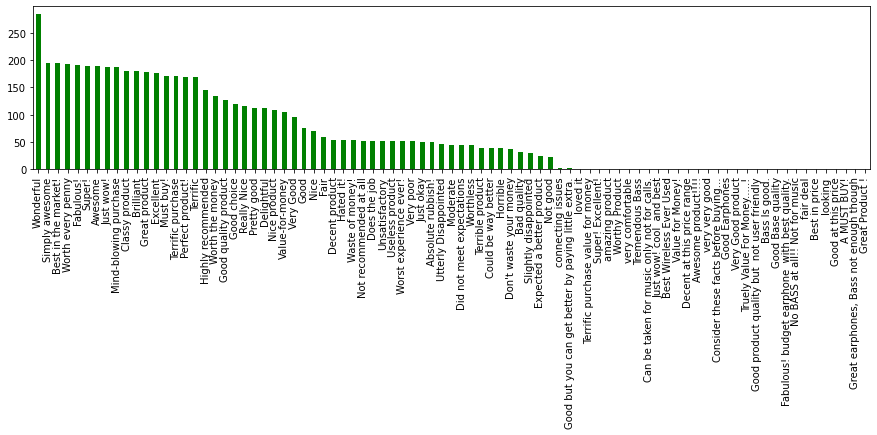

In [17]:




plt.figure(figsize=(15, 3))
train['summary'].value_counts().plot(kind='bar', color="green")

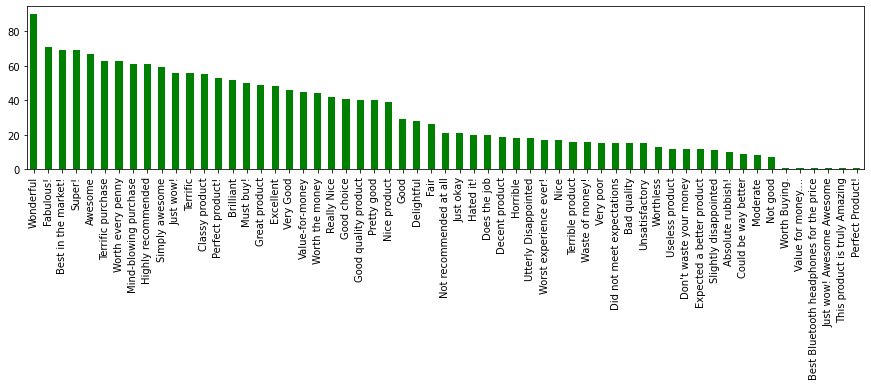

In [18]:




plt.figure(figsize=(15, 3))
validate['summary'].value_counts().plot(kind='bar', color="green")

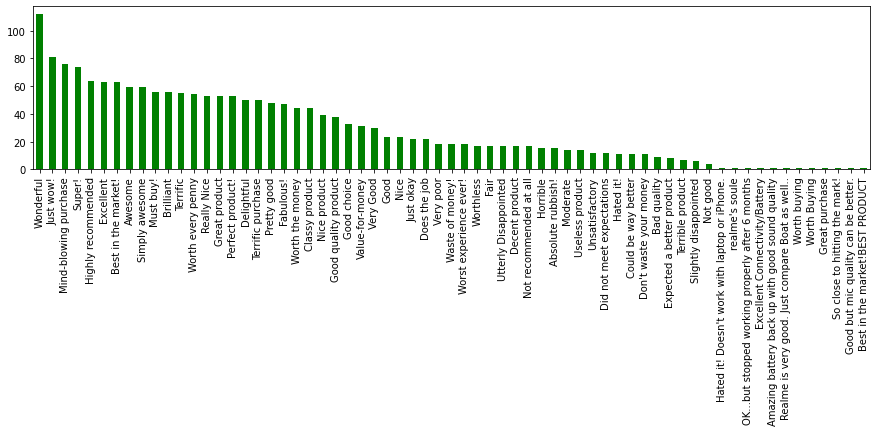

In [19]:




plt.figure(figsize=(15, 3))
test['summary'].value_counts().plot(kind='bar', color="green")